# General Guidelines
##### - Do not add or create cell, write the answer in the space provided
##### - Read carefully what is required to be printed/returned/plotted in the answer. Please do not output what is not asked for. If you used the print function for debugging, comment it out (Ctrl + /) before submitting
##### - All plots should have title, xlabel, ylabel, and legend (if there are more than one curve on the plot)
##### - Use the help() function or consult python documentation when using new functions, or googele and consult stackoverflow
##### - Read the error messages if you get any, and try to understand what they mean. Debugging code is a useful skill to develop
##### - Before submitting, close the assignment and try Cell -> Run all for a final check

In [1]:
import numpy as np
print("Succesfully imported %s -- Version: %s"%(np.__name__,np.__version__))
import scipy
print("Succesfully imported %s -- Version: %s"%(scipy.__name__,scipy.__version__))
import matplotlib.pyplot as plt
print("Succesfully imported %s"%plt.__name__)
import pandas as pd
print("Succesfully imported %s -- Version: %s"%(pd.__name__,pd.__version__))
import sympy as sym 
print("Succesfully imported %s -- Version: %s"%(sym.__name__,sym.__version__))
from scipy import optimize
print("Succesfully imported %s"%optimize.__name__)
from scipy.optimize import fsolve
print("Succesfully imported %s"%fsolve.__name__)
from scipy.signal import find_peaks
print("Succesfully imported %s"%find_peaks.__name__)
from scipy.linalg import orth
print("Succesfully imported %s"%orth.__name__)
from scipy.integrate import odeint
print("Succesfully imported %s"%odeint.__name__)

Succesfully imported numpy -- Version: 1.21.6
Succesfully imported scipy -- Version: 1.7.3
Succesfully imported matplotlib.pyplot
Succesfully imported pandas -- Version: 1.3.5
Succesfully imported sympy -- Version: 1.7.1
Succesfully imported scipy.optimize
Succesfully imported fsolve
Succesfully imported find_peaks
Succesfully imported orth
Succesfully imported odeint


# Soft Materials Egineering Numerical Assignment


### Prerequisites
This assignment is based partially on the theory contained within the textbook Soft Condensed Matter by Richard A. Jones. It is recommended to read the relevant material within that before attempting this assignment.

### Part 1/2: An Ideal Polymer Chain

The conformation of a freely-jointed polymer chain can be described by an ideal random
walk, in much the same way that the trajectory of a particle in Brownian motion can be. The
relevant physical dimensions for simulating this random walk are the degree of
polymerisation, $N$, and the bond length, $a$. For a chain of $N$ links, the end-to-end vector is a sum of the $N$ bond vectors, $\mathbf{r_{i}}$, as illustrated in Figure 1.
$$\mathbf{R}=\mathbf{r_{1}} + \mathbf{r_{2}} + ... + \mathbf{r_{N}} = \sum_{i=1}^{N}\mathbf{r_{i}}$$


<center><img src="Figure1.png" alt="Figure 1" style="background-color:white">
<figcaption>Figure 1: End-to-end vector of random walk.</figcaption></center>


A useful description of the average length of a random walk is the mean square displacement, $\left \langle R^{2} \right \rangle$, which is given by:
$$\left \langle R^{2} \right \rangle = \left \langle \left ( \sum_{i=1}^{N}\mathbf{r_i} \right )\cdot  \left ( \sum_{j=1}^{N}\mathbf{r_j} \right )\right \rangle.$$
Expanding the sum and simplifying for the case of a freely jointed chain, where jump directions are uncorrelated from link to link, gives the familiar random walk result.
$$$$
Another useful quantity is the probability distribution for the end-to-end distance, $R$, denoted $P(R)$, which gives the likelihood of finding a chain of length $R$. Analytically, this distribution can be derived from the Gaussian function. For an ideal random walk in 3D space, this distribution is given by
$$P(R)=4\pi R^{2}\left ( \frac{2\pi}{3} Na^{2}\right )^{-3/2}\exp \left ( -\frac{3}{2}\left ( \frac{R}{a\sqrt{N}} \right )^{2} \right ).$$
This is a continuous function. A random walk simulating a set number of polymer chains, however, will give a discrete, finite set of values for $R$. A discrete representation of $P(R)$ is thus needed. This can be done by dividing all the values for $R$ into bins which represent finite ranges of values of $R$, from which a histogram can be made to obtain a normalised probability distribution.

#### Part 1.1
Consider an ideal polymer chain with bond length $a=1$.

Find the mean square displacement (MSD) at every jump (bond) for a chain with increasing polymerisation
degree $N$ from 1 to 100 in a 3D cubic lattice. The MSD should be calculated at every jump site as the square displacement averaged over however many chains are being simulated. Run simulations with 1, 10, 100 and 1000 chains, plotting the MSD as a function of $N$ for each in separate figures. What do you notice about the plot of
MSD vs $N$ as the number of chains increases?

*(Hint: start with 1 chain and once the code is working properly, only then implement for more chains, to save on computation time)*

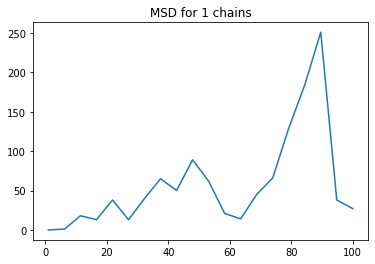

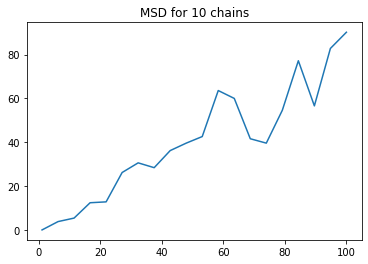

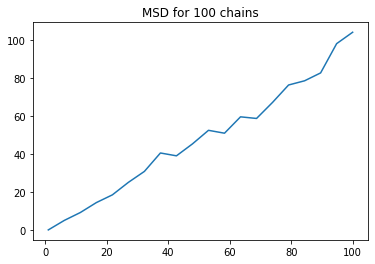

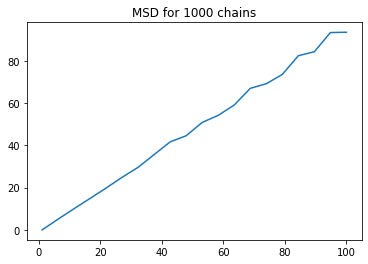

In [2]:
#Your code here
def chain(N, a):
    '''produce a 3D polymer chain in cubic lattice
    
    Args:
        N(int): length of chain (degree of polymerisation)
        a(int): bond length
        
    Returns: 
        numpy array: r. array of visited points'''
    
    ds = np.array([[-a,0,0],[a,0,0],[0,-a,0],[0,a,0],[0,0,-a],[0,0,a]]) #possible steps
    s = np.array([0,0,0]) #start point
    r = np.zeros((3,N)) #collection of points


    for j in range(1,N):
        i = np.random.randint(0,6) #random index
        s = s + ds[i] #most recent end point
        r[:,j]=s #collection of points updated
    
    return r


chains = [1, 10, 100, 1000]
x = np.linspace(1, 100, 20) #20 steps only, to reduce the computation time. Students should figure out what number of steps gives best results compared to computation time

for c in chains:
    MSD = list() #list where MSD values are stored for each plot separately
    for n in range(1, 101, 5):
        R = list() #list where squared end-to-end distances are stored for each N separately
        for i in range(c):
            r = chain(n, 1) #generate a new chain with a = 1
            R.append(np.square(np.linalg.norm(r[:,-1]))) # storing squared end-to-end distances in list R
        MSD.append(sum(R)/len(R)) # compute MSDs for each N

    plt.plot(x, MSD)
    plt.title('MSD for '+ str(c) + ' chains')
    plt.show()


#### Part 1.2
Set now $a=2$ with $N$ still 100 and plot the MSD vs $N$ for 1000 chains. How does this
compare to when $a=1$? What is therefore the relationship between MSD, $N$, and $a$?
Plot the analytical calculation of MSD as a function of $N$ on the same figure for
comparison.

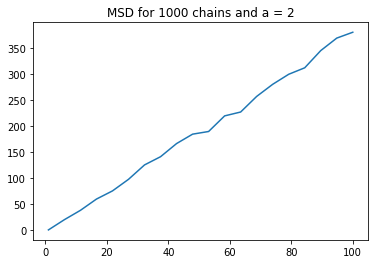

In [3]:
#Your code here

MSD = list() # reset the MSD list
for n in range(1, 101, 5):
    R = list() #list where end-to-end distances are stored for each plot separately
    for i in range(1000):
        r = chain(n, 2) # generate a new chain with a = 2
        R.append(np.square(np.linalg.norm(r[:,-1]))) # storing squared end-to-end distances in list R
    MSD.append(sum(R)/len(R)) # compute MSDs for each N

plt.plot(x, MSD)
plt.title('MSD for 1000 chains and a = 2')
plt.show()

#### Part 1.3
For 1000 polymer chains in a cubic lattice with $a=1$, calculate the probability
distribution for the end-to-end distance, $R$. Represent as histograms using 10, 25, 50
and 100 bins. Plot all four histograms on the same figure. Observe the difference in the
distribution as the number of bins increases, why is this the case?

*(Hint: the matplotlib library allows for the creation of subplots)*

Text(0.5, 1.0, '100 bins')

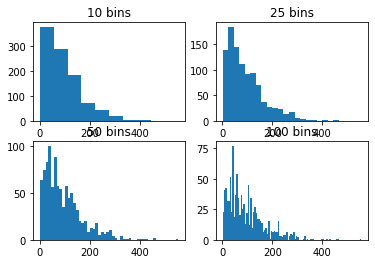

In [4]:
#Your code here

R = list() # reset the R list
for i in range(1000):
    r = chain(n, 1) #generate a new chain with a = 1
    R.append(np.square(np.linalg.norm(r[:,-1]))) # storing squared end-to-end distances in list R
    
fig, axs = plt.subplots(2, 2)
axs[0, 0].hist(R, bins=10)
axs[0, 0].set_title('10 bins')
axs[0, 1].hist(R, bins=25)
axs[0, 1].set_title('25 bins')
axs[1, 0].hist(R, bins=50)
axs[1, 0].set_title('50 bins')
axs[1, 1].hist(R, bins=100)
axs[1, 1].set_title('100 bins')

#### Part 1.4
Repeat part 1.1 but now for a polymer chain in free space. Simulate free space by
using spherical coordinates with the radius equal to $a=1$. Set the azimuthal angle in the
x-y plane from the x-axis, $ϑ$, in the range $0 ≤ ϑ ≤ 2π$ with intervals of $2π/100$, and the
polar angle from the positive z-axis, $φ$, in the range $0 ≤ φ ≤ π$ with intervals of $π/50$.

*(Hint: expressing the spherical coordinates as cartesian coordinates simplifies the
procedure)*

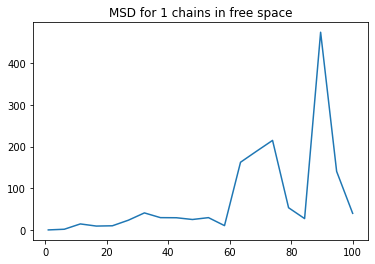

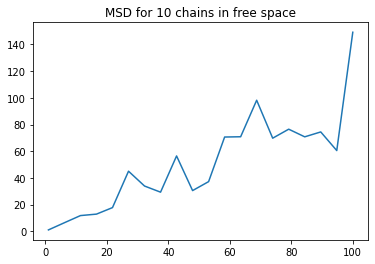

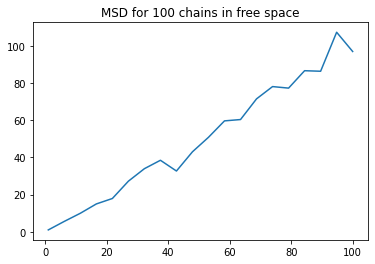

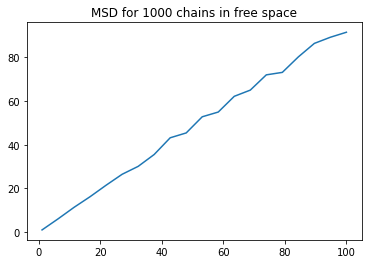

In [5]:
#Your code here
def distribution_freespace(N, chains):
    '''function that returns a list of squared end-to-end distances for number of polymer chains given
    by input chains and a polymerization degree N. This time in free space.
    
    Args:
        N(int): Length of chain (degree of polymerization)
        chains(int): Number of chains that we want to generate
        
    Returns:
        list: dist. List of squared end-to-end distances of every chain'''
    
    end = np.array([[0,0,0]])
    dist = list() #list where squared end-to-end distances are stored
    theta = 0 # defining the angle variables, setting value 0 as default
    phi = 0

    for s in range(chains):
        '''at each iteration for a given chains number the position vector is set to origin'''
        end = np.array([[0,0,0]], dtype = float)
        for i in range(N):
            
            '''angular components are composed of random floats between 0 and pi 
            and between 0 and 2pi for polar and azimuthal angles respectively.'''
            
            theta = np.pi*np.random.random() 
            phi = 2*np.pi*np.random.random()
            end += np.array([[np.sin(theta)*np.cos(phi), np.sin(theta)*np.sin(phi), np.cos(theta)]]) # last position vector (sum of all step vectors)
        dist.append(np.square(np.linalg.norm(end))) # Squared end-to-end distances are stored in list dist

    
    return dist

MSD_free = list() # list for storing MSD values for free space
chains = [1, 10, 100, 1000]
x = np.linspace(1, 100, 20)

for c in chains:
    MSD_free = list() # for each plot we reset the MSD values
    for n in range(1, 101, 5):
        dist = distribution_freespace(n, c)
        MSD_free.append(sum(dist)/len(dist)) # average squared end-to-end distance gives MSD for respective N at a given number of chains

    plt.plot(x, MSD_free)
    plt.title('MSD for '+ str(c) + ' chains in free space')
    plt.show()

#### Part 1.5
Repeat part 1.2 now also for an ideal polymer chain in free space. How does the relationship between MSD, $N$ and $a$ compare to a chain in a cubic lattice?

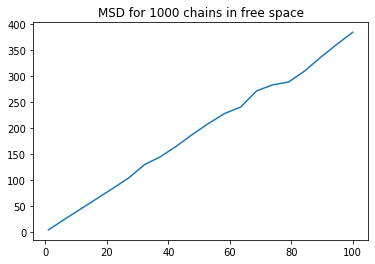

In [6]:
#Your code here
def distribution_freespace(N, chains):
    '''function that returns a list of squared end-to-end distances for number of polymer chains given
    by input chains and a polymerization degree N. This time in free space.
    
    Args:
        N(int): Length of chain (degree of polymerization)
        chains(int): Number of chains that we want to generate
        
    Returns:
        list: dist. List of squared end-to-end distances of every chain'''
    
    end = np.array([[0,0,0]])
    dist = list() #list where squared end-to-end distances are stored
    theta = 0 # defining the angle variables, setting value 0 as default
    phi = 0
    check = np.zeros((chains, 3))
    for s in range(chains):
        '''at each iteration for a given chains number the position vector is set to origin'''
        end = np.array([[0,0,0]], dtype = float)
        for i in range(N):
            '''angular components are composed of random floats between 0 and pi 
            and between 0 and 2pi for polar and azimuthal angles respectively.'''
            theta = np.pi*np.random.random()
            phi = 2*np.pi*np.random.random()
            
            '''a = 2 is accounted for in end vector as a multiplication factor for each element'''
            
            end += np.array([[2*np.sin(theta)*np.cos(phi), 2*np.sin(theta)*np.sin(phi), 2*np.cos(theta)]])
        dist.append(np.square(np.linalg.norm(end)))# Squared end-to-end distances are stored in list dist
        check[s] = end
    
    return dist

MSD_free = list() # list for storing MSD values for free space

x = np.linspace(1, 100, 20)



for n in range(1, 101, 5):
    dist = distribution_freespace(n, 1000)
    MSD_free.append(sum(dist)/len(dist)) # average squared end-to-end distance gives MSD for respective N at a given number of chains

plt.plot(x, MSD_free)
plt.title('MSD for '+ str(c) + ' chains in free space')
plt.show()

#### Part 1.6
Make a 3D plot displaying the conformation of one chain in a cubic lattice and of one chain in free space.

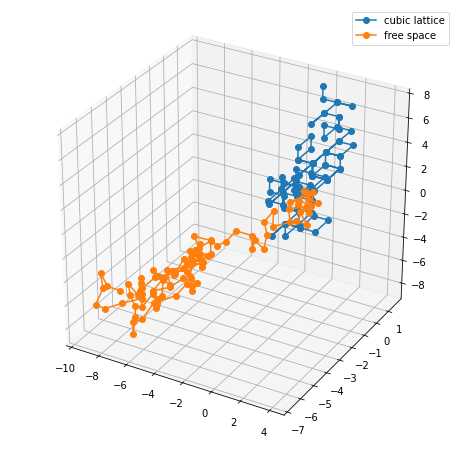

In [7]:
#Your code here


def free_space(N):
    '''function that returns an array of points obtained from random walk in free space
    Args:
        N(int): Length of chain (degree of polymerization)
        
    Returns:
        numpy array: dist. Array of visited points.
    '''
    
    end = np.array([[0,0,0]], dtype = 'float64') 
    dist = np.array([[0,0,0]], dtype = 'float64')
    theta = 0
    phi = 0
    
    for i in range(N):
        theta = np.pi*np.random.random()
        phi = 2*np.pi*np.random.random()
        
        '''each point is defined by a position vector end that updates with every iteration over N steps.
        The position vectors are stored in array dist.'''
        
        end += np.array([[np.sin(theta)*np.cos(phi), np.sin(theta)*np.sin(phi), np.cos(theta)]])
        dist = np.append(dist, end, axis=0)
    return dist

fig = plt.figure(figsize = (8,8))
ax = plt.axes(projection = '3d')


c = chain(100, 1)
f = free_space(100)

ax.plot(c[0,:], c[1,:], c[2,:], label = 'cubic lattice', marker = 'o') #plot the chain in cubic lattice
ax.plot(f[:,0], f[:,1], f[:,2], label = 'free space', marker = 'o') #plot the chain in free space
ax.legend()
plt.show()


### Part 2/2: Excluded Volume Polymer Chain
While the freely jointed chain model is useful for approximating the conformation of chains in many polymer melts, it is somewhat unphysical. In reality, successive links are not free to rotate in any direction but are constrained to certain bond angles due to steric limitations. The angle between adjacent bond vectors, $θ$, is defined as shown in Figure 2.
<center><img src="Figure2.png" alt="Figure 2">
<figcaption>Figure 2: Angles between adjacent bond vectors.</figcaption></center>

There are short-range interactions resulting from chain stiffness and the fact that a chain can never ‘fold back on itself’, giving rise to correlations between successive links. However, these correlations ‘die’ along the chain and so the short-range interactions can be accounted for by dividing the chain up into larger subunits, such that each one is larger than the range of correlations. The random walk model is thus unchanged if using these statistical step lengths, or Kuhn lengths, instead of bond lengths.

In real chains, however, there are also long-range interactions between far-away links, which
alter the random walk model significantly. The rendering of some space inaccessible to links
in the chain causes swelling, or a so called ‘excluded volume’ effect. To simulate this, a self-avoiding
random walk is utilised, wherein no links in the chain may overlap. This is often
used to describe a dilute polymer coil in good solvent. A useful description of the average length of this type of random walk is tge root mean square displacement, defined as a square root of mean square displacement, or $\sqrt{\left \langle R^{2} \right \rangle}$. Flory's result for a swollen coil provides a reasonable approximation of the relationship between the root mean square displacement, the polymerisation degree, and the bond length for a self-avoiding chain. 

#### Part 2.1
Consider an excluded volume polymer chain in good solvent with bond length $a=1$.

Find the root mean square displacement (RMSD) at every jump (bond) for a chain with increasing polymerisation degree $N$ from 1 to 100 in a 2D cubic (square) lattice. There should be no overlapof any links in the chain, not just adjacent links. The RMSD should be calculated at every jump site as the square root of the square displacement averaged over however many chains are being simulated. Run simulations with 1, 10, 100 and 1000 chains, plotting the RMSD as a function of $N$ for each in separate figures. What do you notice about the plot of RMSD vs $N$ as the number of chains increases?

*(Note: in contrast to the first part of the assignment, plot RMSD, not MSD)*

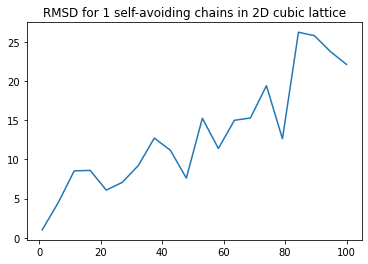

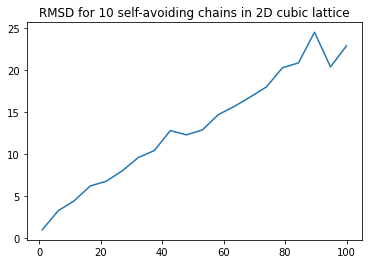

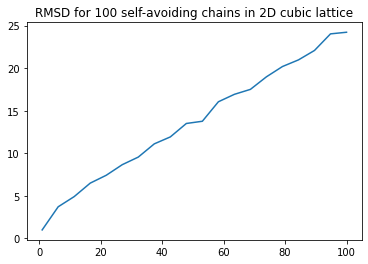

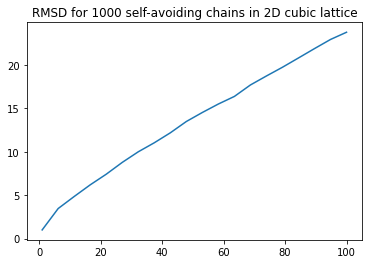

In [8]:
#Your code here
def SARW2D(N, a):
    '''Function that returns an array of points generated by self-avoiding 2D random walk.
    The code stores visited points in 2D matrix. Besides visited points, also the points
    that lead to dead-end are stored in the matrix as visited points. Chain can not proceed
    into any of the visited points.
    
    Args:
        N(int): degree of polymerisation
        a(int): bond length
        
    Returns:
        numpy array: position. Array of generated position vectors.'''
    

    lattice = np.ones((200,200)) #Generate 200x200 matrix to store visited points
    
    lattice[100, 100] = 0 #let the starting position in the matrix be at (100, 100)
    
    position = [[0,0]] #starting position for the polymer remains (0,0)
    
    def check_matrix(lattice, position, a):
        '''Function that returns matrix updated with the restricted points and array of available directions.
        Restricted points are set to 0.
        
        Args:
            lattice(2D numpy array): matrix containing restricted points
            position(numpy array): position vector of the last successful step
            a(int): bond length
            
        Returns:
            numpy array: lattice. Updated matrix containing restricted points
            numpy array/None: dir2. Array of available directions. If no directions is available, None is returned'''
        
        dir1 = np.array([[a, 0], [-a,0], [0,a], [0,-a]]) #array of all possible directions
        
        dir2 = np.ndarray.copy(dir1) #copy dir1 to another array dir2 from which directions will be omitted
        
        p = np.add(position, [100,100]) #translation from physical position to matrix indices

        k = 0 #counting restricted directions in surroundings
        
        for d in range(0, 4):
            r = dir1[d] #save direction into another variable
            
            i = p + r #matrix index with p being current position and r proposed direction


            if lattice[i[0], i[1]] == 0: #check if any of the possible directions lead to a restricted point
                
                dir2 = np.delete(dir2, d-k, 0) #delete the direction leading to restricted point from dir2
                
                k += 1


        if np.size(dir2)==0:
            lattice[p[0], p[1]] = 0 #if there are no directions left, mark current position as restricted point
            
            return lattice, None #return updated matrix and None as dir2 if there are no available directions
        
        else:
            return lattice, dir2 #return updated matrix and list of directions
    
    for step in range(0, N):
        '''At the begining of every step, acquire updated matrix and directions from check_matrix function'''
        
        lattice, dire = check_matrix(lattice, position[-1], a) 
        
        if dire is None:
            while dire is None:
                position = np.delete(position, -1, 0) # go back one step until direction is available
                lattice, dire = check_matrix(lattice, position[-1], a) # update matrix until direction is available
        
        i = np.random.randint(len(dire)-1) # random index
        position = np.append(position, [position[-1] + dire[i]], axis = 0) #append new position vector to position array
        
        lx = position[-1][0] + 100
        ly = position[-1][1] + 100
        lattice[lx,ly] = 0 # for every successful step restrict current position in matrix
            
    return position


chains = [1, 10, 100, 1000]
x = np.linspace(1, 100, 20)


for c in chains:
    RMSD = list() #list of RMSD values
    for n in range(1, 101, 5):
        R = list() #list of end-to-end distances 
        for i in range(c):
            s = SARW2D(n, 1) # generated position vectors for n chains and a=1
            R.append(np.linalg.norm(s[-1])) # end-to-end distances are saved in R
        RMSD.append(sum(R)/len(R)) # average value of end-to-end distances for number of chain c at polymerisation degree n

    plt.plot(x, RMSD)
    plt.title('RMSD for '+ str(c) + ' self-avoiding chains in 2D cubic lattice')
    plt.show()

#### Part 2.2
Set now $a=2$ with $N$ still 100 and plot the RMSD vs $N$ for 1000 chains. Plot the
analytical calculation of RMSD as a function of $N$ using Flory’s result for a swollen coil, taking 0.6 as the exponent, on the same figure for comparison.

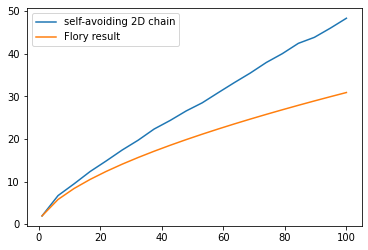

In [9]:
#Your code here

RMSD = list() #list of RMSD values
Flory = list() #list of values obtained from Flory's result

for n in range(1, 101, 5):
    R = list() #list of end-to-end distances
    for i in range(1000):
        
        s = SARW2D(n, 2) # generated position vectors for n chains and a=1
        
        R.append(np.linalg.norm(s[-1])) # end-to-end distances are saved in R
        
    Flory.append(2*n**0.6) # Flory's result: 2*N^2
    
    RMSD.append(sum(R)/len(R)) # average value of end-to-end distances for number of chain c at polymerisation degree n


x = np.linspace(1, 100, 20)
plt.plot(x, RMSD, label = 'self-avoiding 2D chain')
plt.plot(x, Flory, label = 'Flory result')
plt.legend()
plt.show()


#### Part 2.3
Repeat part 2.1 but now for a 3D cubic lattice.

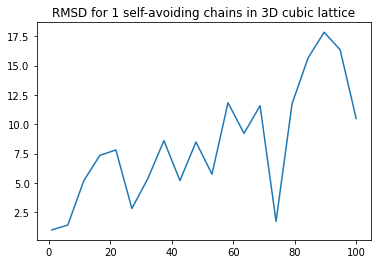

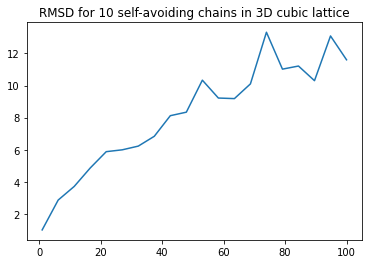

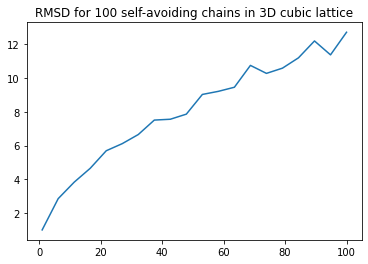

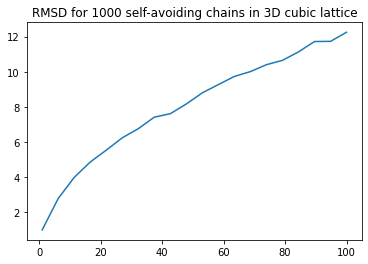

In [10]:
#Your code here
def SARW3D(N, a):
    '''Function that returns an array of points generated by self-avoiding 3D random walk.
    The code stores visited points in 3D matrix. Besides visited points, also the points
    that lead to dead-end are stored in the matrix as visited points. Chain can not proceed
    into any of the visited points.
    
    Args:
        N(int): degree of polymerisation
        a(int): bond length
        
    Returns:
        numpy array: position. Array of generated position vectors.'''
    
        #Divide square to 200x200 matrix:
    lattice = np.ones((200,200,200))
    #let the starting position be at (100, 100)
    lattice[100, 100,100] = 0
    s0 = [100,100,100]
    position = [[0,0,0]]
    def check_matrix(lattice, position, a):
        '''Function that returns matrix updated with the restricted points and array of available directions.
        Restricted points are set to 0.
        
        Args:
            lattice(2D numpy array): matrix containing restricted points
            position(numpy array): position vector of the last successful step
            a(int): bond length
            
        Returns:
            numpy array: lattice. Updated matrix containing restricted points
            numpy array/None: dir2. Array of available directions. If no directions is available, None is returned'''
        
        dir1 = np.array([[a, 0, 0], [-a,0, 0], [0,a,0], [0,-a,0], [0,0,a], [0,0,-a]]) #array of all possible directions
        
        dir2 = np.ndarray.copy(dir1) #copy dir1 to another array dir2 from which directions will be omitted
        
        p = np.add(position, [100,100,100]) #translation from physical position to matrix indices

        k = 0 #counting restricted directions in surroundings
        for d in range(0, 6):
            
            r = dir1[d] #save direction into another variable
            i = p + r #matrix index with p being current position and r proposed direction


            if lattice[i[0], i[1], i[2]] == 0: #check if any of the possible directions lead to a restricted point
                
                dir2 = np.delete(dir2, d-k, 0) #delete the direction leading to restricted point from dir2
                k += 1


        if np.size(dir2)==0:
            lattice[p[0], p[1], p[2]] = 0 #if there are no directions left, mark current position as restricted point
            return lattice, None #return updated matrix and None as dir2 if there are no available directions
        
        else:
            return lattice, dir2 #return updated matrix and list of directions
    
    for step in range(0, N):
        '''At the begining of every step, acquire updated matrix and directions from check_matrix function'''
        lattice, dire = check_matrix(lattice, position[-1], a)
        
        if dire is None:
            while dire is None:
                position = np.delete(position, -1, 0) # go back one step until direction is available
                lattice, dire = check_matrix(lattice, position[-1], a) # update matrix until direction is available
        
        i = np.random.randint(len(dire)) # random index
        position = np.append(position, [position[-1] + dire[i]], axis = 0) #append new position vector to position array
        lx = position[-1][0] + 100
        ly = position[-1][1] + 100
        lz = position[-1][2] + 100
        lattice[lx,ly,lz] = 0 # for every successful step restrict current position in matrix
            
    return position


chains = [1, 10, 100, 1000]
x = np.linspace(1, 100, 20)


for c in chains:
    RMSD = list()
    for n in range(1, 101, 5):
        R = list()
        for i in range(c):
            s = SARW3D(n, 1)
            R.append(np.linalg.norm(s[-1]))
        RMSD.append(sum(R)/len(R))

    plt.plot(x, RMSD)
    plt.title('RMSD for '+ str(c) + ' self-avoiding chains in 3D cubic lattice')
    plt.show()

#### Part 2.4
Repeat Part 2.2 but now for a 3D cubic lattice.

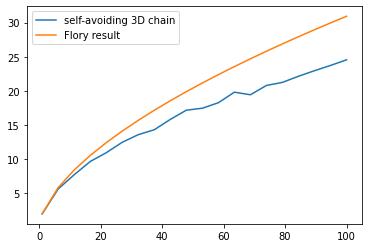

In [11]:
#Your code here

RMSD = list() #list of RMSD values

Flory = list() #list of values obtained from Flory's result

for n in range(1, 101, 5):
    R = list() #list of end-to-end distances
    for i in range(1000):
        s = SARW3D(n, 2) # generated position vectors for n chains and a=1
        
        R.append(np.linalg.norm(s[-1])) # end-to-end distances are saved in R
        
    Flory.append(2*n**0.6) # Flory's result: 2*N^2
    
    RMSD.append(sum(R)/len(R)) # average value of end-to-end distances for number of chain c at polymerisation degree n

plt.plot(x, RMSD, label = 'self-avoiding 3D chain')
plt.plot(x, Flory, label = 'Flory result')
plt.legend()
plt.show()

#### Part 2.5
Make a 2D plot displaying the conformation of one chain in a 2D cubic (square) lattice and a
separate 3D plot for one chain in a 3D cubic lattice.

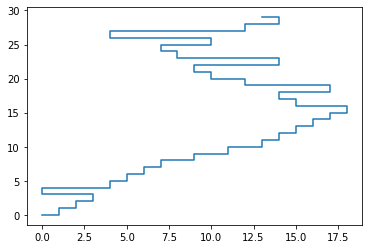

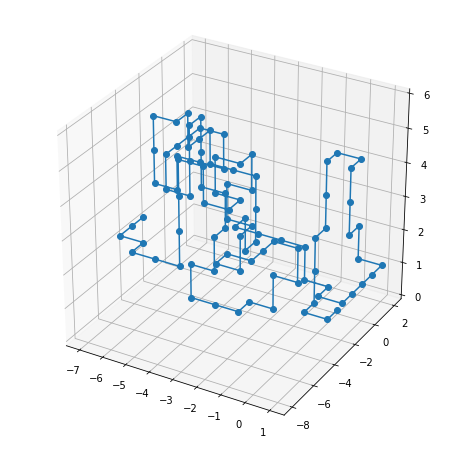

In [12]:
#Your code here
'''We obtain points from SARW2D and SARW3D and plot them on respective plots'''
position = SARW2D(100, 1)
plt.plot(position[:, 0], position[:, 1])
plt.show()

p = SARW3D(100, 1)
fig = plt.figure(figsize = (8,8))
ax = plt.axes(projection = '3d')
ax.plot(p[:, 0], p[:, 1], p[:, 2], marker = 'o') # for a clearer perspective visited points are marked
plt.show()

#### Part 2.6
For 1000 polymer chains in a 3D cubic lattice, calculate the probability distribution for
the end-to-end distance, or $R$. Use 10, 25, 50 and 100 bins. Plot all four histograms
on the same figure.

Text(0.5, 1.0, '100 bins')

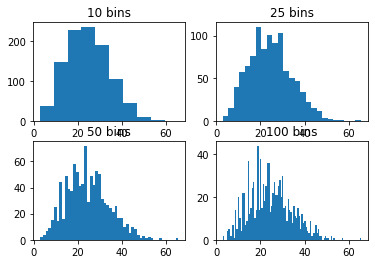

In [13]:
#Your code here
fig, axs = plt.subplots(2, 2)
axs[0, 0].hist(R, bins=10)
axs[0, 0].set_title('10 bins')
axs[0, 1].hist(R, bins=25)
axs[0, 1].set_title('25 bins')
axs[1, 0].hist(R, bins=50)
axs[1, 0].set_title('50 bins')
axs[1, 1].hist(R, bins=100)
axs[1, 1].set_title('100 bins')